In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=14)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # fontsize of the legend
plt.rc('figure', titlesize=18)   

directory = "/home/ariel/lorenzo.mugnai/USER_DATA/Alfnoor2/20250226 - NAOJ/week 4/forwards/ArielInstrumentTier2"
subfolders = [name for name in os.listdir(directory) if os.path.isdir(os.path.join(directory, name))]

print(subfolders)

len(subfolders)


['TOI-1801bMig', 'K2-26bFidu', 'TOI-1266cMig', 'LTT3780cFidu', 'HD108236dMig', 'TOI-421bMig', 'GJ1214bMig', 'HD108236eFidu', 'TOI-251bFidu', 'TOI-776cFidu', 'G9-40bFidu', 'K2-26bMig', 'HD108236eMig', 'HD63935bFidu', 'TOI-4336AbFidu', 'TOI-122bMig', 'HD63935bMig', 'HD28109dFidu', 'TOI-269bFidu', 'K2-3bMig', 'HD28109dMig', 'HD109833bFidu', 'TOI-700cFidu', 'TOI-1468cMig', 'HD109833bMig', 'HD63433cFidu', 'TOI-4438bFidu', 'TOI-2136bMig', 'HD63433cMig', 'TOI-1136cFidu', 'LP791-18cFidu', 'HD191939bMig', 'TOI-1136eFidu', 'TOI-1136cMig', 'TOI-270dFidu', 'HD191939cMig', 'TOI-1136gFidu', 'TOI-1136eMig', 'GJ1214bFidu', 'HD191939dMig', 'TOI-421bFidu', 'TOI-1136gMig', 'HD191939bFidu', 'TOI-1266bMig', 'Kepler-109cFidu', 'LTT3780cMig', 'HD191939cFidu', 'G9-40bMig', 'HD191939dFidu', 'TOI-4336AbMig', 'TOI-782bFidu', 'HD108236dFidu', 'TOI-269bMig', 'TOI-2120bFidu', 'TOI-700cMig', 'TOI-904bFidu', 'TOI-4438bMig', 'TOI-1470cFidu', 'LP791-18cMig', 'TOI-663cFidu', 'TOI-251bMig', 'TOI-270dMig', 'TOI-270cFidu',

88

Text(0, 0.5, 'Transit depth')

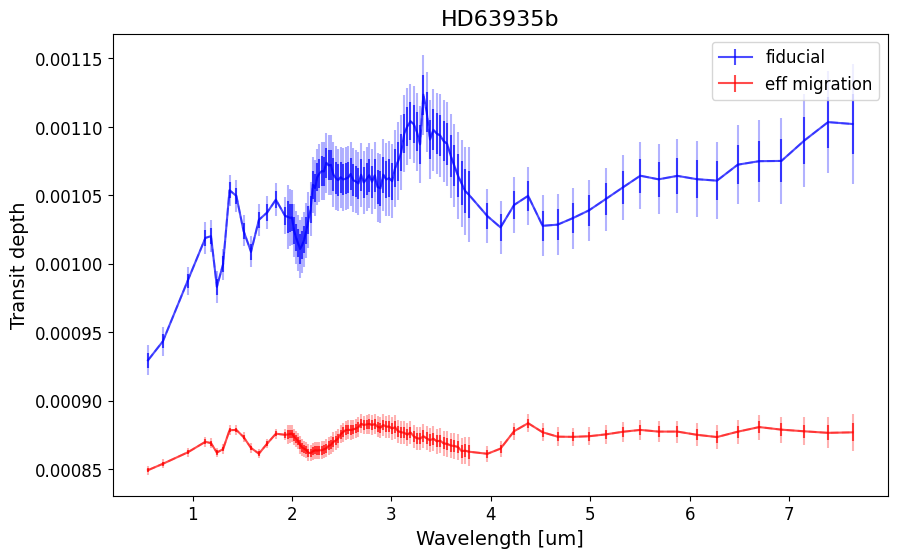

In [2]:
fig = plt.figure(figsize=(10, 6))
pl = "HD63935"
files_ = [f for f in subfolders if pl in f]
colors = ['blue', 'red']
for c, file_ in zip(colors, files_):
    label = "eff migration" if "Mig" in file_ else "fiducial"
    data = np.loadtxt('forwards/ArielInstrumentTier1/'+file_+'/'+file_+'.txt').T
    plt.errorbar(data[0], data[1], yerr=data[2], alpha=0.3, color=c, linestyle='--')

    data = np.loadtxt('forwards/ArielInstrumentTier2/'+file_+'/'+file_+'.txt').T
    plt.errorbar(data[0], data[1], yerr=data[2], alpha=0.7, label=label, color=c)

plt.title("HD63935b")

plt.legend()
plt.xlabel('Wavelength [um]')
plt.ylabel('Transit depth')

In [3]:
import h5py

nobs = []
for file_ in files_:
    file_name = ('forwards/ArielInstrumentTier2/'+file_+'/'+file_+'.hdf5')
    with h5py.File(file_name, 'r') as f:
        # print(f["ModelParameters/Chemistry"].keys())
        nobs.append(f["Output/Spectra/instrument_nobs"][()])

print(nobs)

[64.0, 735.0]


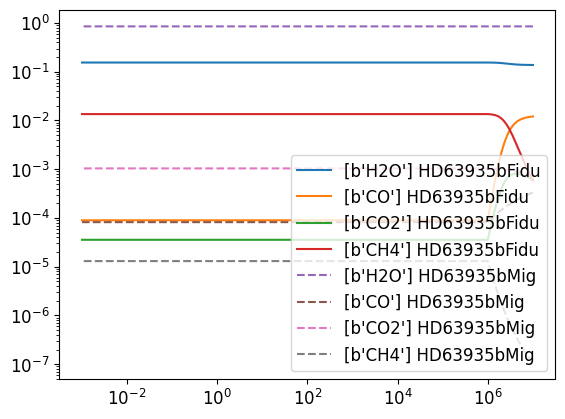

In [4]:
# files = ["Planet99542_Reduced"]
# files = subfolders

file_name = ('forwards/ArielInstrumentTier2/'+files_[0]+'/'+files_[0]+'.hdf5')
with h5py.File(file_name, 'r') as f:
    fname = (f["ModelParameters/Chemistry/filename"][()])
    mols = f["ModelParameters/Chemistry/active_gases"][()]
    profile = f["Output/Profiles/active_mix_profile"][()] 
    
    fname = fname.decode("utf-8").split("/")[-1]
    for m,p in zip(mols, profile):
        label = f"{m} {files_[0]}"
        plt.plot(f["Output/Profiles/pressure_profile"][()], p, label=label)

file_name = ('forwards/ArielInstrumentTier2/'+files_[1]+'/'+files_[1]+'.hdf5')
with h5py.File(file_name, 'r') as f:
    fname = (f["ModelParameters/Chemistry/filename"][()])
    mols = f["ModelParameters/Chemistry/active_gases"][()]
    profile = f["Output/Profiles/active_mix_profile"][()] 
    
    fname = fname.decode("utf-8").split("/")[-1]
    for m,p in zip(mols, profile):
        label = f"{m} {files_[1]}"
        plt.plot(f["Output/Profiles/pressure_profile"][()], p, ls="--", label=label)


# plt.annotate(fname, (0.1, 0.1), xycoords="axes fraction")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()
    # nobs.append(f["Output/Spectra/instrument_nobs"][()])
    

        # plt.show()